In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('D:/documents/1_projects/GreenDesign/Инвентаризация/modif/result_1.xlsx', index_col='Unnamed: 0')

In [3]:
df.head()

,Наименование ОГ,Субъект РФ,Цех,Наименование площадки,Объект предприятия,Оборудование/ процесс с выделением ПГ,Номер ИЗАВ по ПДВ,Тип ИЗАВ (организованный/неорганизованный),вид_топлива,название_топлива,расход_топлива_т_год,вид_выбросов_со2,количество_выбросов_со2_т_год,вид_выбросов_сh4,количество_выбросов_сh4_т_год,вид_выбросов_пг_с_пгп,количество_выбросов_пг_с_пгп_т_год,вид_оборудования
0,"АО ""АНПЗ ВНК""",Красноярский край,NaN,АО «АНПЗ ВНК»,NaN,"Трубчатые печи С-100, С-200, С-300/1, С-300/2",0001,организованный,газообразное топливо,иное газообразное топливо,73.841413,Стационарное сжигание топлива,287340.876,NaN,NaN,NaN,NaN,печь
1,"АО ""АНПЗ ВНК""",Красноярский край,NaN,АО «АНПЗ ВНК»,NaN,Печь 100-Н-1,0501,организованный,газообразное топливо,иное газообразное топливо,1.040051,Стационарное сжигание топлива,4209.749,NaN,NaN,NaN,NaN,печь
2,"АО ""АНПЗ ВНК""",Красноярский край,NaN,АО «АНПЗ ВНК»,NaN,Печь стабилизационной колонны П-303,0303,организованный,газообразное топливо,иное газообразное топливо,4.210273,Стационарное сжигание топлива,16383.532,NaN,NaN,NaN,NaN,печь
3,"АО ""АНПЗ ВНК""",Красноярский край,NaN,АО «АНПЗ ВНК»,NaN,Трубчатые и циклонные печи установки ВТ - биту...,"0006, 0007",организованный,газообразное топливо,иное газообразное топливо,8.760556,Стационарное сжигание топлива,31296.653,NaN,NaN,NaN,NaN,печь
4,"АО ""АНПЗ ВНК""",Красноярский край,NaN,АО «АНПЗ ВНК»,NaN,Котлоагрегаты пускопиковой котельни,0018,организованный,газообразное топливо,иное газообразное топливо,20.129816,Стационарное сжигание топлива,77008.026,NaN,NaN,NaN,NaN,котел


Группируем по обществам

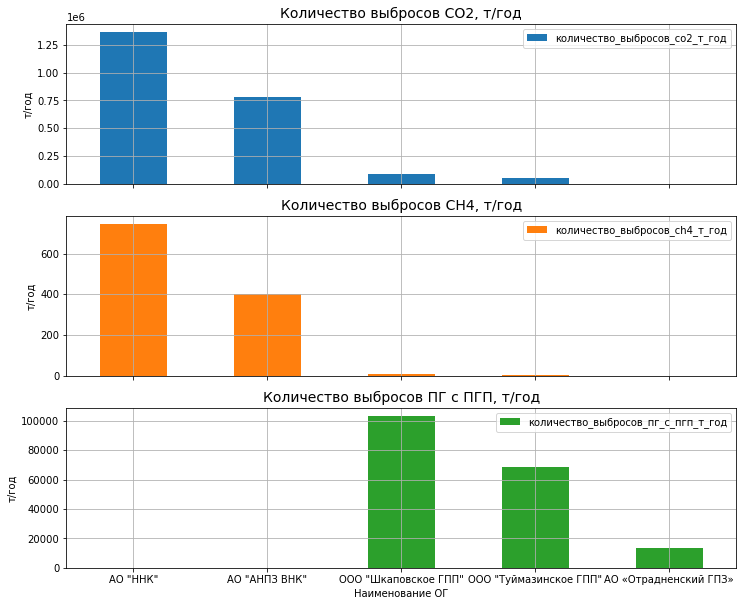

In [36]:
df_og_group = df.groupby(by='Наименование ОГ', as_index=False)[['количество_выбросов_со2_т_год', 'количество_выбросов_сh4_т_год', 'количество_выбросов_пг_с_пгп_т_год']].sum()\
    .sort_values(by='количество_выбросов_со2_т_год', ascending=False)

axes = df_og_group.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 10),
    x='Наименование ОГ',
    subplots=True,
    rot=0
);
axes[0].set_title('Количество выбросов СО2, т/год', fontsize=14)
axes[1].set_title('Количество выбросов CH4, т/год', fontsize=14)
axes[2].set_title('Количество выбросов ПГ с ПГП, т/год', fontsize=14);

axes[0].set_ylabel('т/год')
axes[1].set_ylabel('т/год')
axes[2].set_ylabel('т/год');

Группируем по оборудованию

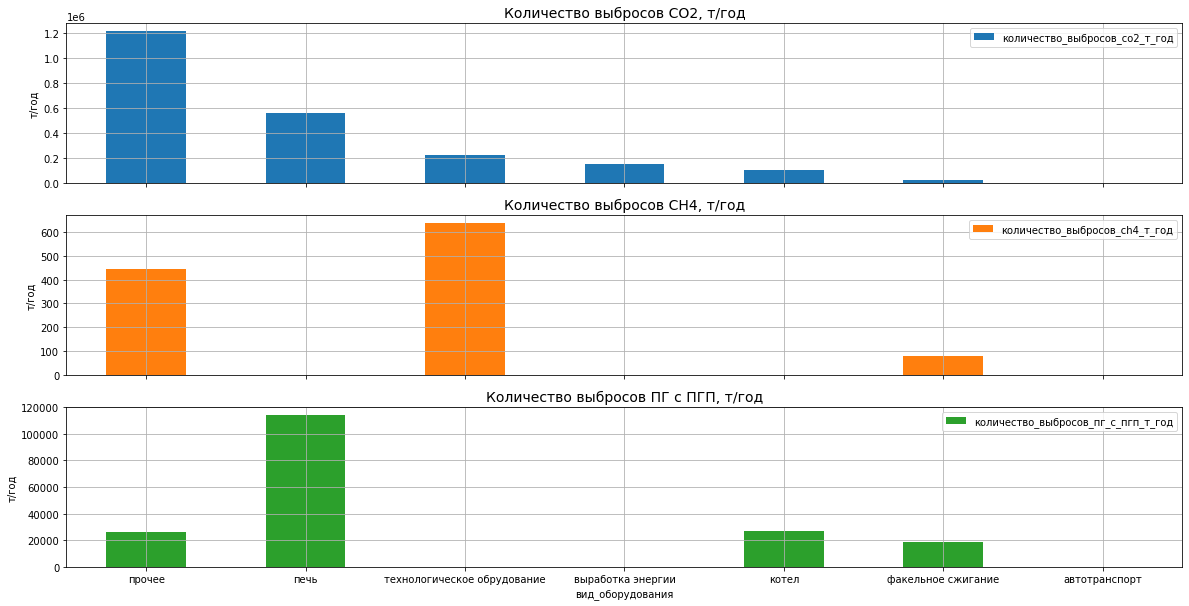

In [40]:
df_equip_group = df.groupby(by='вид_оборудования', as_index=False)[['количество_выбросов_со2_т_год', 'количество_выбросов_сh4_т_год', 'количество_выбросов_пг_с_пгп_т_год']].sum()\
    .sort_values(by='количество_выбросов_со2_т_год', ascending=False)

axes = df_equip_group.plot( 
    kind='bar', 
    grid=True, 
    figsize=(20, 10),
    x='вид_оборудования',
    subplots=True,
    rot=0
);
axes[0].set_title('Количество выбросов СО2, т/год', fontsize=14)
axes[1].set_title('Количество выбросов CH4, т/год', fontsize=14)
axes[2].set_title('Количество выбросов ПГ с ПГП, т/год', fontsize=14);

axes[0].set_ylabel('т/год')
axes[1].set_ylabel('т/год')
axes[2].set_ylabel('т/год');